NameError: name 'window_x' is not defined

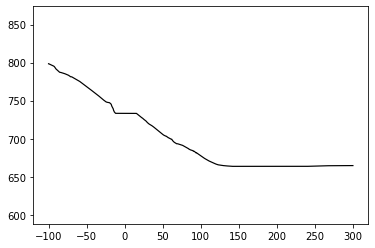

In [15]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Lake bed line coordinate data from Cad file
file_name = 'bedline_data.txt'
bed_data = []
with open(file_name) as infile:
    for line in infile:
        cadcrd = re.findall('\d*\.?\d+', line)
        crd_temp = []
        for num_crd in cadcrd:
            crd_temp.append(float(num_crd))
        bed_data.append(crd_temp)
scale = 1/2
convert_x = [bed_data[0][0], -100]
convert_y = [(7834.5970+7854.2321)/2, 735] # Manually calculated coordinate
x = []
y = []
for crd in bed_data:
    x.append((crd[0]-convert_x[0])*scale + convert_x[1])
    y.append((crd[1]-convert_y[0])*scale + convert_y[1])

## Plot lines
# reservoir bed line
plt.plot(x,y,'k',linewidth=1.2)
plt.axis('equal')
plt.gca().set(xlim =(window_x[0],window_x[1]), ylim=(window_y[0],window_y[1]))
plt.gcf().set_size_inches(fig_size[0], fig_size[1])

# elevations of intakes
for El in El_intake:
    plt.plot([x[0], x[-1]],[El, El],'r-.',linewidth=1.2)
plt.plot([x[0], x[-1]],[El_outlet, El_outlet],'b-.',linewidth=1.2)

d_enc = h_enc*np.sqrt(1+slope**2) # vertical height of encasement section
d_pip = ID_st*np.sqrt(1+slope**2) # vertical height of pipe section
d_enc_v = h_enc_v*np.sqrt(1+slope**2) # vertical height of vent encasement section
d_pip_v = ID_st_v*np.sqrt(1+slope**2) # vertical height of vent pipe section

## Plot blocks
# intake blocks
count = 0
for El in El_intake:
    count += 1
    x_blk = [sta[count*2][0]]
    y_blk = [El + h_intake]
    path_blk = [[-L_blk,0],[0,-h_blk-h_key],[L_key,0],[0,h_key],[L_blk-L_key,0],[0,h_blk]]
    for path in path_blk:
        x_blk.append(x_blk[-1]+path[0])
        y_blk.append(y_blk[-1]+path[1])

    plt.plot(x_blk,y_blk,'b',linewidth=w_line)

# thrust block
x_blk = [sta[-2][0]]
y_blk = [sta[-2][1] + d_enc/2]
path_blk = [[0,-h_tst1-h_key_tst],[L_key_tst,0],[0,h_key_tst],[L_tst-L_key_tst,0],
            [0,h_tst2],[-L_tst,+h_tst1-h_tst2]]
for path in path_blk:
    x_blk.append(x_blk[-1]+path[0])
    y_blk.append(y_blk[-1]+path[1])
plt.plot(x_blk,y_blk,'b',linewidth=w_line)

# air vent block
x_vent = [crd_init[0]]
y_vent = [crd_init[1]]
path_vent = [[0,h_blk_v],[-L_blk_v,0],[0,-h_blk_v-h_key_v],[L_key_v,0],
             [0,h_key_v],[L_blk_v-L_key_v,0]]
for path in path_vent:
    x_vent.append(x_vent[-1]+path[0])
    y_vent.append(y_vent[-1]+path[1])
plt.plot(x_vent,y_vent,'b',linewidth=w_line)

# plot intake pipes
for i in range(count+1):
    if i == 0:
        d_temp1 = d_enc_v/2
        d_temp2 = d_pip_v/2
    else:
        d_temp1 = d_enc/2
        d_temp2 = d_pip/2
    plt.plot([sta[2*i][0],sta[2*i+1][0]], [sta[2*i][1]+d_temp1,sta[2*i+1][1]+d_temp1],'b',linewidth=w_line)
    plt.plot([sta[2*i][0],sta[2*i+1][0]], [sta[2*i][1]-d_temp1,sta[2*i+1][1]-d_temp1],'b',linewidth=w_line)
    plt.plot([sta[2*i][0],sta[2*i+1][0]], [sta[2*i][1]+d_temp2,sta[2*i+1][1]+d_temp2],'b',linewidth=w_line)
    plt.plot([sta[2*i][0],sta[2*i+1][0]], [sta[2*i][1]-d_temp2,sta[2*i+1][1]-d_temp2],'b',linewidth=w_line)

x_center = []
y_center = []
for a in sta:
    x_center.append(a[0])
    y_center.append(a[1])
plt.plot(x_center,y_center,'k-.',linewidth=1)

## Plot pipes
# intake pipe
count = 0
for El in El_intake:
    count += 1
    x_intake = [sta[count*2][0], sta[count*2][0]+L_pip_intake, sta[count*2][0]+L_pip_intake, sta[count*2][0]]
    y_intake = [El-ID_pip_intake/2,El-ID_pip_intake/2,El+ID_pip_intake/2,El+ID_pip_intake/2]
    plt.plot(x_intake,y_intake,'b',linewidth=w_line)
    
# air pipe
dia_ratio = 2 # U-pipe inner/outer diameter ratio
r_i = ID_pip_air/(dia_ratio-1)

theta_temp = np.linspace(0, 180, 91)

x_air = [crd_init[0]-L_blk_v/2-ID_pip_air/2,crd_init[0]-L_blk_v/2-ID_pip_air/2,crd_init[0]-L_blk_v/2+ID_pip_air/2,
    crd_init[0]-L_blk_v/2+ID_pip_air/2]
y_air = [El_airvent, crd_init[1]+h_blk_v, crd_init[1]+h_blk_v, El_airvent]

for theta in theta_temp:
    x_air.append(crd_init[0]-L_blk_v/2+ID_pip_air/2+r_i-r_i*np.cos(theta/180*np.pi))
    y_air.append(El_airvent+r_i*np.sin(theta/180*np.pi))
for theta in theta_temp:
    x_air.append(crd_init[0]-L_blk_v/2+ID_pip_air/2+r_i+dia_ratio*r_i*np.cos(theta/180*np.pi))
    y_air.append(El_airvent+dia_ratio*r_i*np.sin(theta/180*np.pi))
plt.plot(x_air,y_air,'b',linewidth=w_line)
plt.plot([crd_init[0]-L_blk_v/2+ID_pip_air/2+r_i*(1+dia_ratio), crd_init[0]-L_blk_v/2+ID_pip_air/2+r_i*(1+dia_ratio)+5]
        ,[El_airvent,El_airvent],'k:',linewidth=1)
plt.text(crd_init[0]-L_blk_v/2+ID_pip_air/2+r_i*(1+dia_ratio)+5.5,El_airvent, 'AIR VENT EL.')
plt.grid()
# plt.gca().invert_xaxis() # reverse x-axis
plt.show()